## Odev 4 EK

### Ödev 4 Ön Çalışma

In [2]:
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

%matplotlib notebook

zeros = np.array([0])
poles = np.array([1/4, 1/2])
b, a = signal.zpk2tf(zeros, poles, 1)#Gain yok o yüzden 1
b, a

#yukardaki yerine bu şekilde de olur
a = signal.convolve(np.array([1, -1/4]), np.array([1, -1/2]))
a

#Basit kesirlere ayirma
r, p , k = signal.residuez(b, a)
r, p, k
print(f"x[n] = {r[0]} * {p[0]}^n * u[n] + {r[1]}*{p[1]}^n * u[n]")


# returns the polynomial coefficients of the denominator
#poless = np.roots(a)

num = np.array([1,0,0]) # we add zeros to match the size of num and 
denum = np.array([1, -3.0/4, 1.0/8]) # coeffs of denum
#payda 1- 3/4 z^-1 + 1/8 z^-2
#pay katsayılarını da z^0 1 kalanları 0 boyutları aynı olsun diye

               #sistem katsayıları    baslangic kosulu sample sayisi 
n, x = signal.dimpulse((num, denum, 1), x0 = 0, n = 10)
print(x)

#x is the inverse transform as an n-dimensional array, so we use the function
#to reduce the redundant dimensions.
plt.figure()
plt.stem(n, np.squeeze(x))

n = np.arange(0,10,1) # define the index vector for 10 points
xpf = -(1.0/4)**n + 2*(1.0/2)**n # result of Ornek-7
num = np.array([1, 0, 0]) # we add zeros to match the size of num an
denum = np.array([1, -3.0/4, 1.0/8]) # coeffs of denum
n1, xpse = signal.dimpulse((num, denum, 1),x0=0, n=10)
xpse = np.squeeze(xpse)

plt.figure()
plt.subplot(2,1,1), plt.stem(n, xpf), plt.ylabel('$x_{pf}[n]$')
plt.subplot(2,1,2), plt.stem(n, xpse), plt.ylabel('$x_{pse}[n]$')
plt.xlabel('index vector (sample)')

zeros = np.array([-1])
poles = np.array([1j/2, -1j/2, 1/4])

#To obtain frequency response of z transform weuse freqz_zpk()
w, H = signal.freqz_zpk(zeros, poles, 1)

plt.figure()
plt.plot(w/np.pi, abs(H)) # plot the magnitude in logarithmic scale with blue 
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

#To convert transfer function
num, denum = signal.zpk2tf(zeros, poles, 1)

w1, H_tf = signal.freqz(num, denum)

plt.figure()
plt.plot(w1/np.pi, abs(H_tf)) # plot the magnitude in logarithmic scale with blue
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

#x[n] = 2cos(0.2pin) + sin(0.9pin)
n = np.arange(0, 40, 1)#define the index vector
xn = 2 * np.cos(0.2*np.pi*n)
yn = signal.lfilter(num, denum, xn)

plt.figure()
plt.stem(n, yn)

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

#https://www.dsprelated.com/showcode/244.php
def zplane(b,a,filename=None):
    Plot the complex z-plane given a transfer function.
    

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.grid()
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k


zeross = np.array([-1])
poless = np.array([-1j/2, 1j/2, -1/4])
gain = 1

b, a = signal.zpk2tf(zeross, poless, gain)

plt.figure()
zplane(b, a)

num = np.array([1, 0, 1])
denum = np.array([1, -1/2])

plt.figure()
zplane(num, denum)

# Now, we define the frequency response as:
w = np.linspace(0, 2*np.pi, 100)
Hw = (1+np.exp(-2*1j*w))/(1-(1/2)*np.exp(-1j*w))
# alternatively, we could use the sgnl.freqz_zpk() function to calculate the Frequen
# or sgnl.freqz() function to calculate from the coefficients.
Hw_abs = abs(Hw)
plt.figure()
plt.plot(w/np.pi, Hw_abs)
plt.grid()
plt.xlabel('$\omega$ x$\pi$ rad/sample')

"""

'\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport scipy.signal as signal\n\n%matplotlib notebook\n\nzeros = np.array([0])\npoles = np.array([1/4, 1/2])\nb, a = signal.zpk2tf(zeros, poles, 1)#Gain yok o yüzden 1\nb, a\n\n#yukardaki yerine bu şekilde de olur\na = signal.convolve(np.array([1, -1/4]), np.array([1, -1/2]))\na\n\n#Basit kesirlere ayirma\nr, p , k = signal.residuez(b, a)\nr, p, k\nprint(f"x[n] = {r[0]} * {p[0]}^n * u[n] + {r[1]}*{p[1]}^n * u[n]")\n\n\n# returns the polynomial coefficients of the denominator\n#poless = np.roots(a)\n\nnum = np.array([1,0,0]) # we add zeros to match the size of num and \ndenum = np.array([1, -3.0/4, 1.0/8]) # coeffs of denum\n#payda 1- 3/4 z^-1 + 1/8 z^-2\n#pay katsayılarını da z^0 1 kalanları 0 boyutları aynı olsun diye\n\n               #sistem katsayıları    baslangic kosulu sample sayisi \nn, x = signal.dimpulse((num, denum, 1), x0 = 0, n = 10)\nprint(x)\n\n#x is the inverse transform as an n-dimensional array, so we use the fun

## Ödev 4 EK Kod

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal



#### 2-)

[0.75+0.j 0.5 +0.j 0.25+0.j]
[ 1.+0.j  1.+0.j -1.+0.j]


Text(0.5, 1.0, 'Soru1 Basit Kesir Dönüşümü ile ile h[n]')

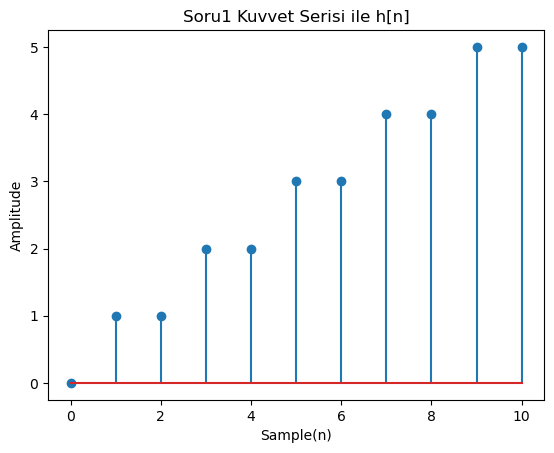

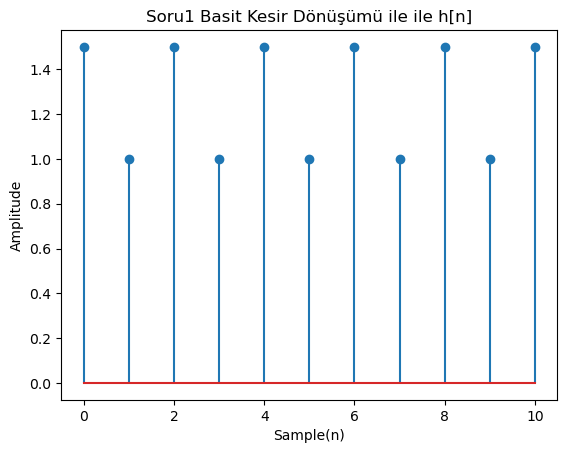

In [8]:
#Kuvvet Serisi ile bulma
num = np.array([0, 1, 0, 0])
denum = np.array([1, -1, -1, 1])

n, h1 = signal.dimpulse((num, denum, 1), x0=0, n = 11)
plt.figure()
plt.stem(n, np.squeeze(h1))
plt.xlabel("Sample(n)")
plt.ylabel("Amplitude")
plt.title("Soru1 Kuvvet Serisi ile h[n]")

zeros, poles, gain = signal.tf2zpk(num, denum)

b, a = signal.zpk2tf(zeros, poles, 1)


#Basit kesirlere ayirma 
n = np.arange(0, 11)
r, p ,k = signal.residue(b, a) #bu işlem sonucu bulunan baş katsayılar ve kutuplar aşağıdaki gibi r * p^n * u[n] şeklinde kullanılmıştır.
                               #Sanırım bir şeyi atladığım için grafikler uyuşmuyor.
print(r)
print(p)

hpf = r[0] * (p[0]**n) * np.heaviside(n,1) + r[1]*(p[1]**n) * np.heaviside(n,1)+ r[2]*(p[2]**n) * np.heaviside(n,1)
plt.figure()
plt.stem(n, hpf)
plt.xlabel("Sample(n)")
plt.ylabel("Amplitude")
plt.title("Soru1 Basit Kesir Dönüşümü ile ile h[n]")


#### 3-)

[ 2.         -0.33333333  0.5       ]
[ 0.         -0.33333333 -0.5       ]


Text(0.5, 1.0, 'Soru 4 Basit Kesir Dönüşümü ile ile h[n]')

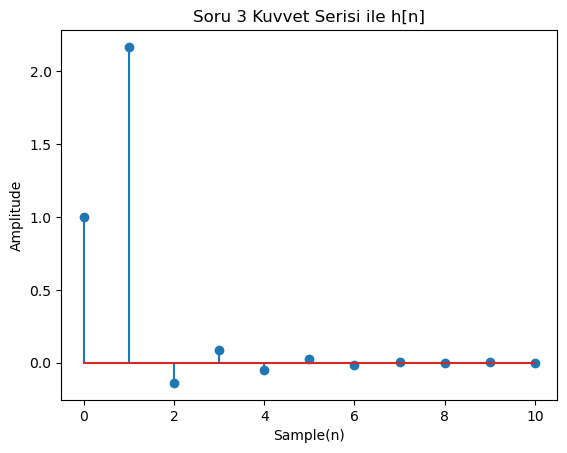

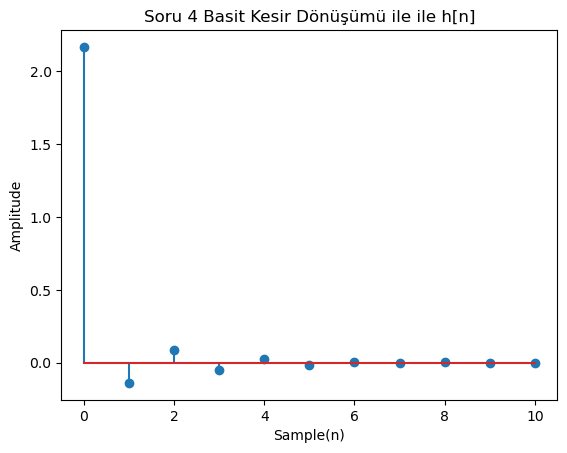

In [9]:
#Kuvvet Serisi ile bulma
num = np.array([1, 3, 11/6, 1/3])
denum = np.array([1, 5/6, 1/6, 0])

n, h1 = signal.dimpulse((num, denum, 1), x0 =0, n = 11)
plt.figure()
plt.stem(n, np.squeeze(h1))
plt.xlabel("Sample(n)")
plt.ylabel("Amplitude")
plt.title("Soru 3 Kuvvet Serisi ile h[n]")

zeros, poles, gain = signal.tf2zpk(num, denum)

b, a = signal.zpk2tf(zeros, poles, 1)


#Basit kesirlere ayirma 
n = np.arange(0, 11)
r, p ,k = signal.residue(b, a)

print(r)
print(p)



hpf = r[0] * (p[0]**n) * np.heaviside(n,1) + r[1]*(p[1]**n) * np.heaviside(n,1)+ r[2]*(p[2]**n) * np.heaviside(n,1)
plt.figure()
plt.stem(n, hpf)
plt.xlabel("Sample(n)")
plt.ylabel("Amplitude")
plt.title("Soru 4 Basit Kesir Dönüşümü ile ile h[n]")

#print(h1)
#print(hpf)

#### 4-)

[-0.19069982+0.j          0.59534991-0.32552059j  0.59534991+0.32552059j]
[0.5  +0.j         0.707+0.70721355j 0.707-0.70721355j]


Text(0.5, 1.0, 'Soru 4 Basit Kesir Dönüşümü ile ile h[n]')

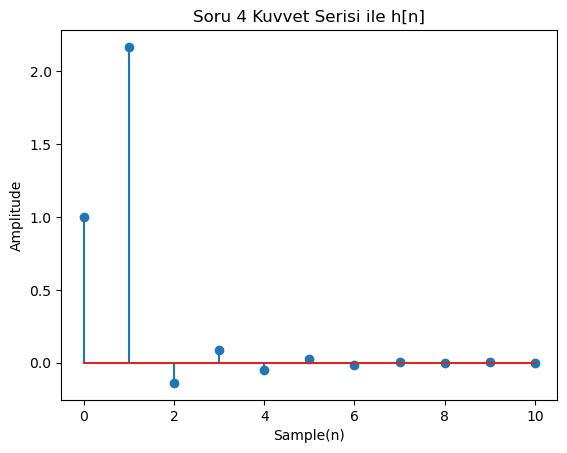

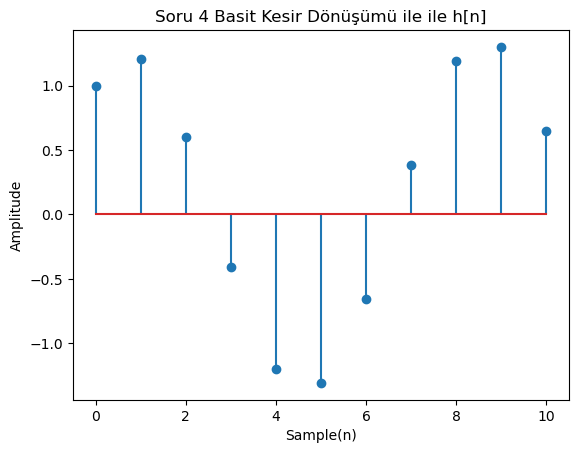

In [10]:
num = np.array([10, -7.071, 0, 0])
denum = np.array([1, -1.914, 1.707, -0.5])

n, h = signal.dimpulse((num, denum, 1), x0 = 0, n = 11)
plt.figure()
plt.stem(n, np.squeeze(h1))
plt.xlabel("Sample(n)")
plt.ylabel("Amplitude")
plt.title("Soru 4 Kuvvet Serisi ile h[n]")

zeros, poles, gain = signal.tf2zpk(num, denum)

b, a = signal.zpk2tf(zeros, poles, 1)


#Basit kesirlere ayirma 
n = np.arange(0, 11)
r, p ,k = signal.residuez(b, a)

print(r)
print(p)



hpf = r[0] * (p[0]**n) * np.heaviside(n,1) + r[1]*(p[1]**n) * np.heaviside(n,1)+ r[2]*(p[2]**n) * np.heaviside(n,1)
plt.figure()
plt.stem(n, hpf)
plt.xlabel("Sample(n)")
plt.ylabel("Amplitude")
plt.title("Soru 4 Basit Kesir Dönüşümü ile ile h[n]")

#### 5-) Bu Ödevin bana kazandırdıkları:

Bu ödev sayesinde z dönüşümünü ve özelliklerini yakından inceleme ve test etme fırsatı buldum,  Sistem fonksiyonunun formlarını ve nasıl kullanabileceğimi öğrendim. Sonlu ve sonsuz  uzunlukta işaretlerin Z dönüşümlerini test edip doğru yaklaşımın hangisi olacağını öğrendim. Yakınsama bölgesi olarak bildiğimiz "ROC" un sisteme etkisini öğrenip test etme fırsatı buldum. birim çemberi bu alan içindeyse sistemin kararlı olduğunu öğrendim. Kutup sfır diyagramlarının nasıl çizdirildiğini , DZD sistemler ile ROC un özelliklerini öğrendim. Python kullanarak Z dönüşümü işlemlerinin bilgisayar ortamında nasıl yapıldığını öğrendim. Aynı zamanda ters Z dönüşümünün nasıl hesaplanacağını hem teorik hem bilgisayar ortamında pratik şekilde görmüş oldum. Kutup sıfır diyagramlarından frekans cevabını nasıl yorumlayacağımızı öğrendim.